# Import necessary libraries

In [1]:
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for data visualization
%matplotlib inline
import numpy as np  # NumPy for numerical operations
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import seaborn as sns  # Seaborn for data visualization

# Import machine learning models
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # For binary classification
from sklearn.naive_bayes import MultinomialNB  # For multi-class classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier

# Import machine learning evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Import tools for data splitting
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Duplicate import, remove one



### Read the dataset from "failure.csv" into a DataFrame


In [2]:
# Read the dataset from "failure.csv" into a DataFrame
filename = "failure.csv"
df = pd.read_csv(filename)


## EDA 

In [3]:
# Display a random sample of 15 rows from the DataFrame
df.sample(15)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
30169,2015-02-08,S1F0S65X,0,77586968,0,0,0,8,270732,0,0,0
113103,2015-08-14,W1F0M02P,0,133932176,0,1,6,10,504835,0,0,33
107165,2015-07-27,S1F131F6,0,166409264,0,0,0,8,249471,0,0,0
88783,2015-06-04,S1F0JGJV,0,71877488,0,0,0,8,257917,0,0,0
39974,2015-02-22,S1F0T24J,0,52697552,0,0,0,12,231612,0,0,0
76428,2015-05-01,S1F0R4Q8,0,188241256,0,0,0,8,211701,0,0,0
46832,2015-03-04,S1F13K7S,0,95958368,0,0,0,9,221371,0,0,0
82532,2015-05-17,S1F122HQ,0,102572224,0,0,0,11,215102,0,0,1
108601,2015-07-31,W1F1BTB2,0,44760936,0,0,0,19,365991,0,0,0
121067,2015-09-27,Z1F18YST,0,186744856,0,0,0,8,293303,0,0,0


In [4]:
def summarize_data(df):
    print("Number of rows and columns:", df.shape)
    print("\nColumns in the dataset:", df.columns)
    print("\nData types and missing values:")
    print(df.info())
    print("\nSummary statistics for numerical columns:")
    print(df.describe())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nUnique values in 'failure' column:")
    print(df['failure'].value_counts())

# Call the function to summarize the data
summarize_data(df)


Number of rows and columns: (124494, 12)

Columns in the dataset: Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10),

We do not have any null values, but we have a very small number of positive samples for the target variable, indicating an undersampling problem.


<Axes: xlabel='device', ylabel='count'>

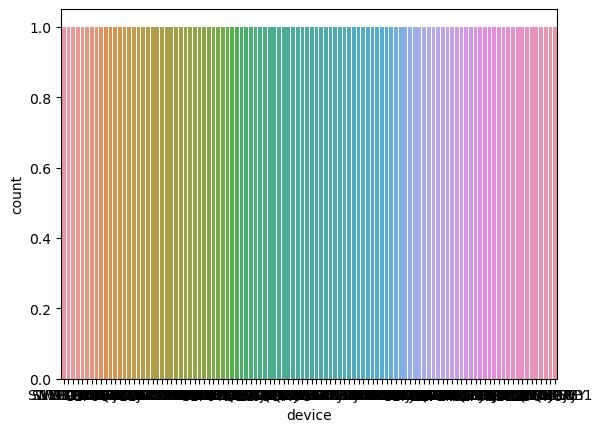

In [5]:
# Visualize the distribution of 'failure' with respect to 'device'
sns.countplot(x="device", data=df.loc[df["failure"] == 1])

 It appears that the 'device' column is not important for this analysis. We will drop it.


In [6]:
df.drop("device",axis=1,inplace=True)

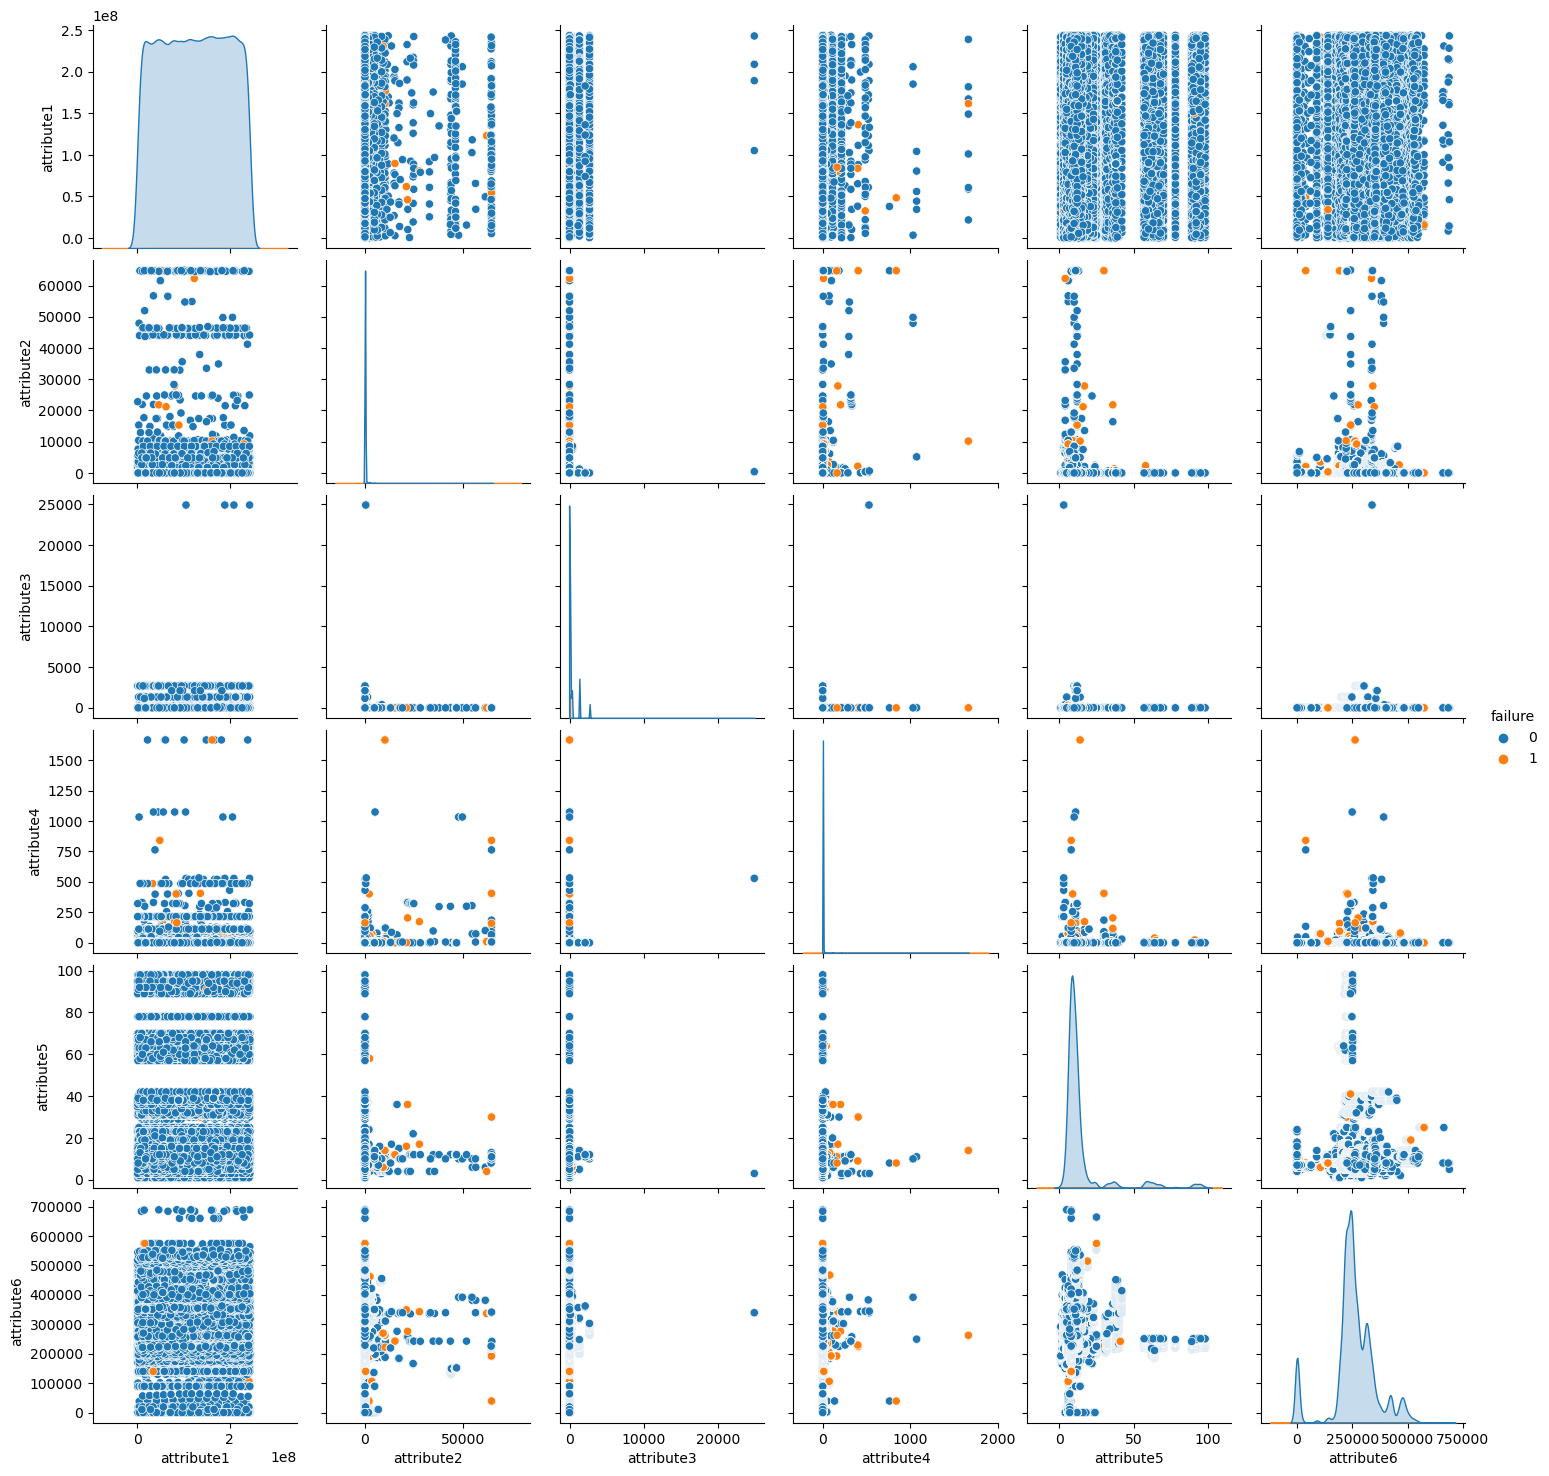

In [7]:
# Visualize pair plots for selected attributes with 'failure' as hue
sns.pairplot(df, hue='failure', vars=['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6'])


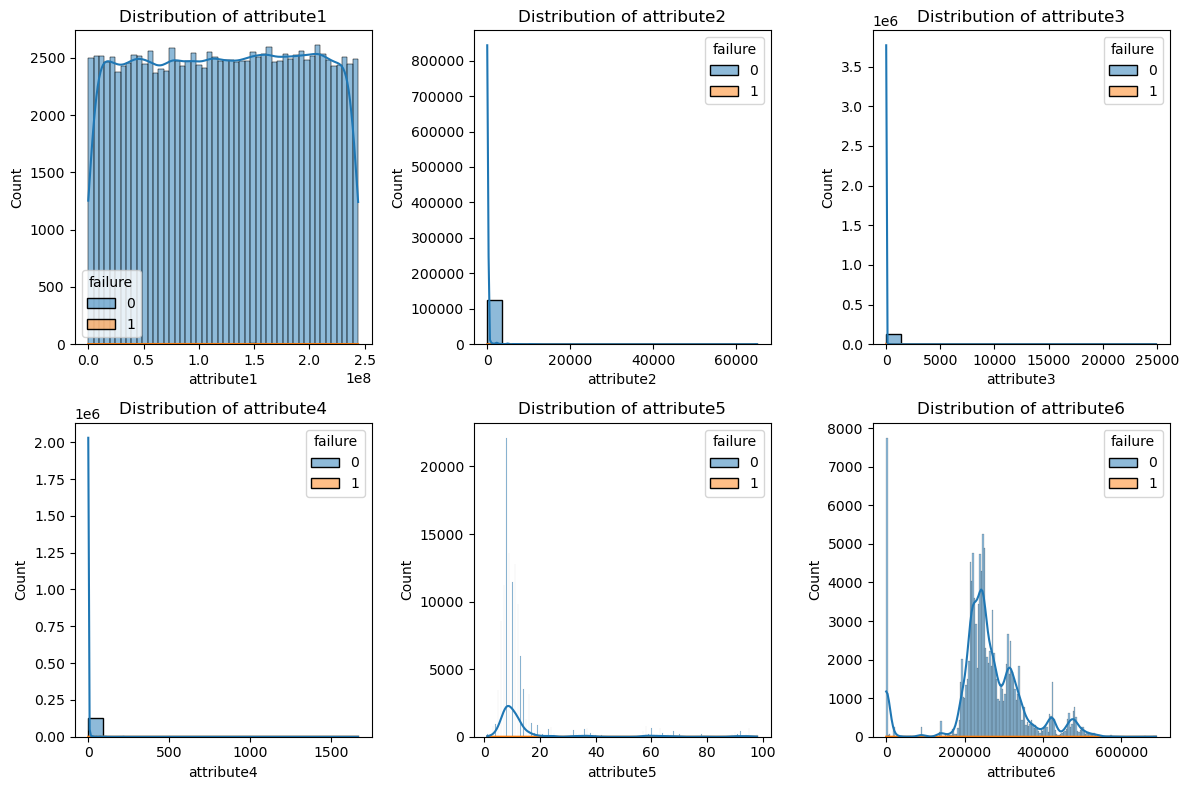

In [8]:
# Create histograms to visualize the distribution of selected attributes with 'failure' as hue
plt.figure(figsize=(12, 8))
for i, col in enumerate(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, hue='failure', kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Failure over Time by Month')

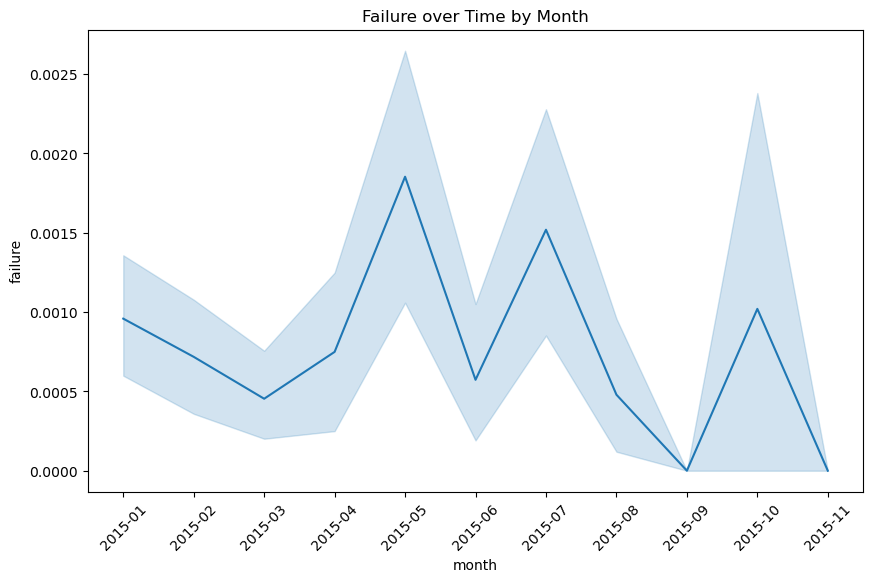

In [9]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract and format the 'month' column for plotting
df['month'] = df['date'].dt.to_period('M')
df['month'] = df['month'].dt.strftime('%Y-%m')

# Create a line plot to visualize 'failure' over time by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Month")


Text(0.5, 1.0, 'Failure over Time by Week')

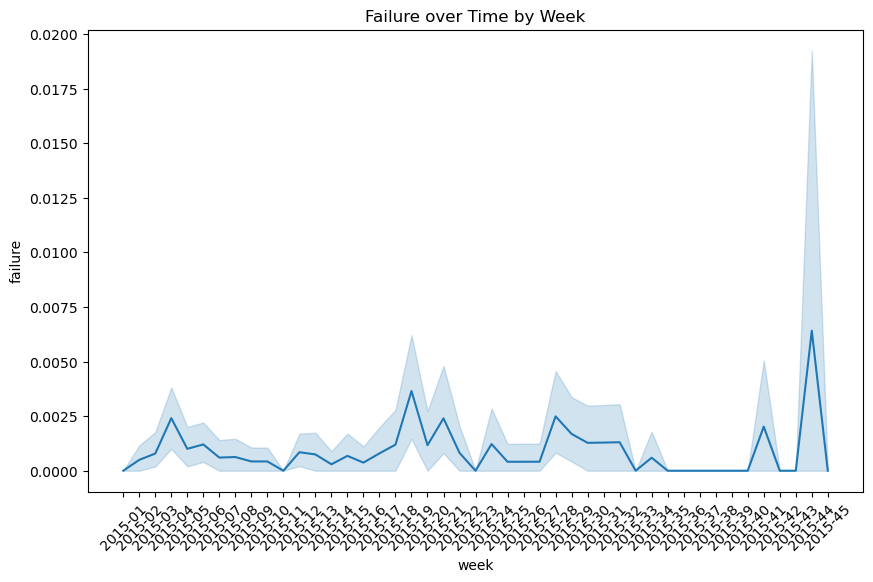

In [10]:

# Extract and format the 'week' column for plotting
df['week'] = df['date'].dt.to_period('W')
df['week'] = df['week'].dt.strftime('%Y-%U')

# Create a line plot to visualize 'failure' over time by week
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='week', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Week")


Text(0.5, 1.0, 'Correlation Matrix')

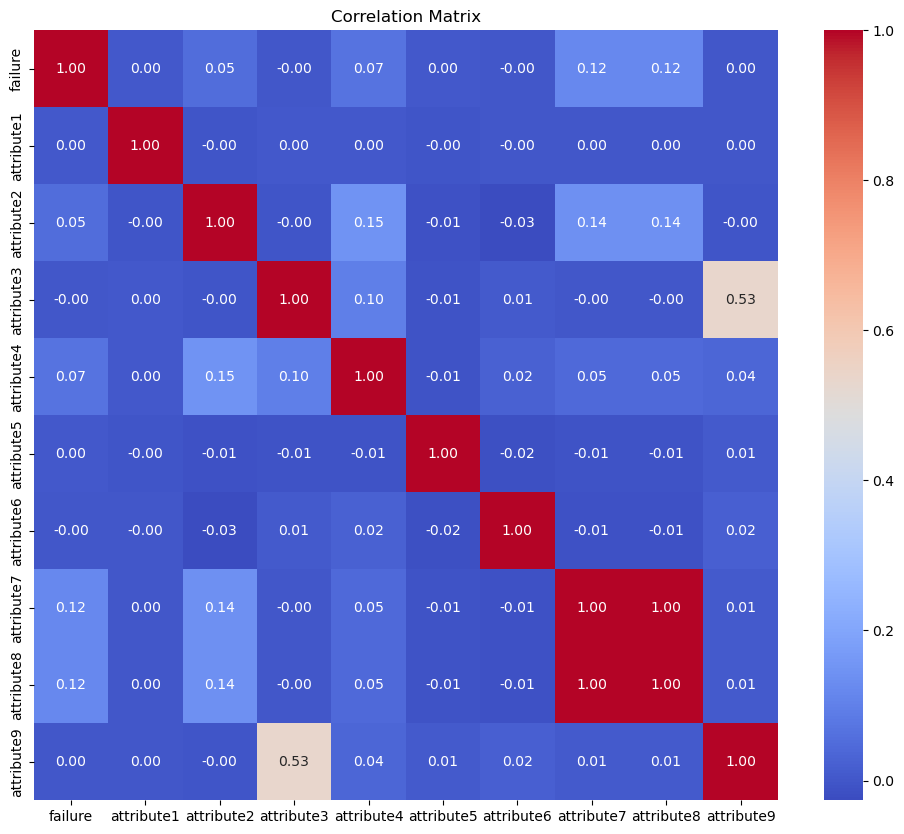

In [11]:

# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")


Text(0.5, 1.0, "Distribution of 'failure'")

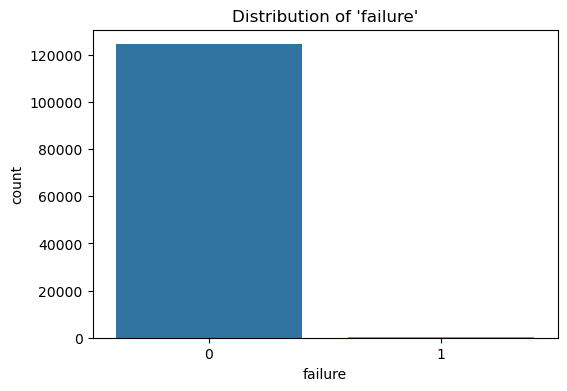

In [12]:

# Create a countplot to visualize the distribution of 'failure'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='failure')
plt.title("Distribution of 'failure'")



So the problem is undersampling problem!

In [13]:

# Extract day of week, day of month, and is_weekend features from the 'date' column
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


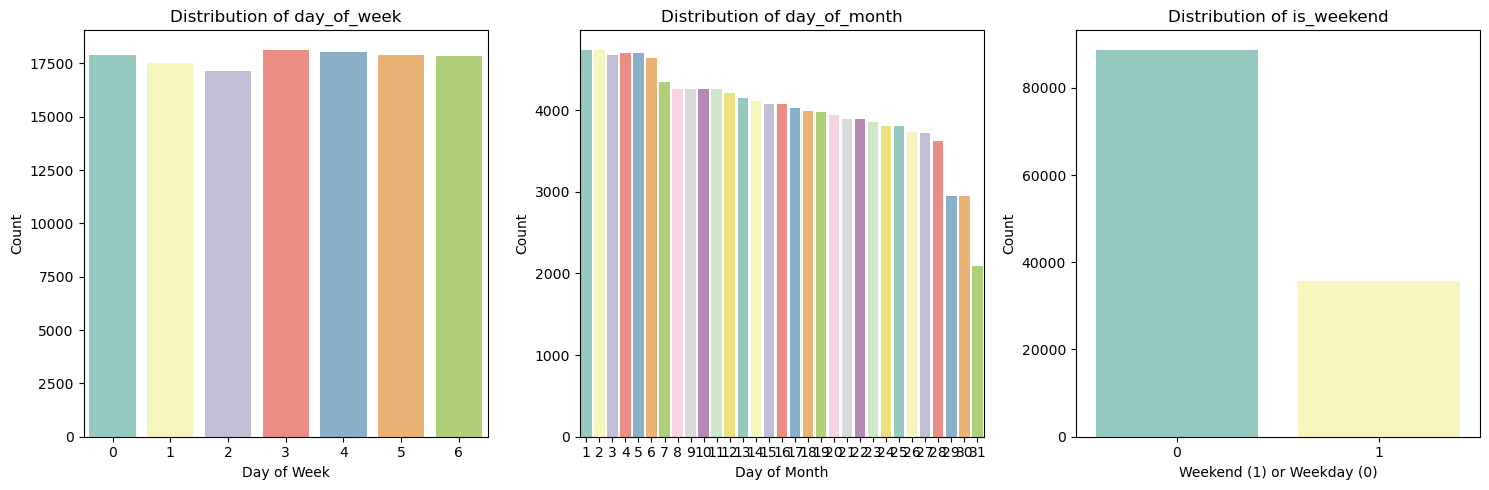

In [14]:

# Create subplots to visualize the distribution of day_of_week, day_of_month, and is_weekend
plt.figure(figsize=(15, 5))

# Distribution of 'day_of_week'
plt.subplot(131)
sns.countplot(data=df, x='day_of_week', palette='Set3')
plt.title("Distribution of day_of_week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

# Distribution of 'day_of_month'
plt.subplot(132)
sns.countplot(data=df, x='day_of_month', palette='Set3')
plt.title("Distribution of day_of_month")
plt.xlabel("Day of Month")
plt.ylabel("Count")

# Distribution of 'is_weekend'
plt.subplot(133)
sns.countplot(data=df, x='is_weekend', palette='Set3')
plt.title("Distribution of is_weekend")
plt.xlabel("Weekend (1) or Weekday (0)")
plt.ylabel("Count")

# Show the subplots
plt.tight_layout()
plt.show()

In [15]:
# Extract the month number and week number from the 'date' column and drop the 'date' column
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df = df.drop(['date'], axis=1)

# Check the DataFrame information after these transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   failure       124494 non-null  int64 
 1   attribute1    124494 non-null  int64 
 2   attribute2    124494 non-null  int64 
 3   attribute3    124494 non-null  int64 
 4   attribute4    124494 non-null  int64 
 5   attribute5    124494 non-null  int64 
 6   attribute6    124494 non-null  int64 
 7   attribute7    124494 non-null  int64 
 8   attribute8    124494 non-null  int64 
 9   attribute9    124494 non-null  int64 
 10  month         124494 non-null  int32 
 11  week          124494 non-null  UInt32
 12  day_of_week   124494 non-null  int32 
 13  day_of_month  124494 non-null  int32 
 14  is_weekend    124494 non-null  int64 
dtypes: UInt32(1), int32(3), int64(11)
memory usage: 12.5 MB


In [16]:
#pip install imblearn

In [17]:
# Import the necessary library for undersampling
from imblearn.under_sampling import RandomUnderSampler



In [18]:
# Create a copy of the DataFrame 'df'
X = df.copy()

# Create the target variable 'Y' by selecting the 'failure' column
Y = df["failure"]

# Remove the 'failure' column from the feature matrix 'X'
X.drop("failure", axis=1, inplace=True)


In [19]:

# Create an instance of the RandomUnderSampler with a fixed random state
rus = RandomUnderSampler(random_state=42)

# Perform random under-sampling and obtain resampled feature matrix and target variable
X_resampled, y_resampled = rus.fit_resample(X, Y)


In [20]:

# Create a new DataFrame 'under_sample' by copying the resampled features and adding the 'failure' column back
under_sample = X_resampled.copy()
under_sample["failure"] = y_resampled


In [21]:

# Display a random sample of 10 rows from the under-sampled dataset
under_sample.sample(10)

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,month,week,day_of_week,day_of_month,is_weekend,failure
91884,215816160,0,15,0,95,250831,0,0,155,6,24,4,12,0,0
18991,192865952,0,0,9,36,271129,0,0,0,1,4,4,23,0,1
32887,133400224,0,0,0,10,194921,0,0,0,2,7,3,12,0,0
89223,119291952,0,0,0,11,221532,0,0,0,6,23,4,5,0,0
61266,108593408,0,0,0,12,313857,0,0,0,3,13,2,25,0,0
22038,133047312,0,0,0,37,294694,0,0,0,1,5,1,27,0,0
82927,80616240,27856,0,173,17,342856,0,0,5,5,21,0,18,0,1
26132,46099450,21816,0,204,36,276221,0,0,1,2,6,0,2,0,1
57039,192488552,0,0,21,41,242150,8,8,10,3,12,3,19,0,1
48804,200243040,296,0,6,14,237437,0,0,0,3,10,5,7,1,0


In [22]:


# Display basic information about the under-sampled dataset
print("Number of rows and columns:", under_sample.shape)
print("\nColumns in the dataset:", under_sample.columns)
print("\nData types and missing values:")
print(under_sample.info())

# Summary statistics for numerical columns in the under-sampled dataset
print("\nSummary statistics for numerical columns:")
print(under_sample.describe())

# Check for missing values in the under-sampled dataset
print("\nMissing values:")
print(under_sample.isnull().sum())

# Count the number of unique values in the 'failure' column (our target variable) in the under-sampled dataset
print("\nUnique values in 'failure' column:")
print(under_sample['failure'].value_counts())


Number of rows and columns: (212, 15)

Columns in the dataset: Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9', 'month', 'week',
       'day_of_week', 'day_of_month', 'is_weekend', 'failure'],
      dtype='object')

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 111948 to 124329
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   attribute1    212 non-null    int64 
 1   attribute2    212 non-null    int64 
 2   attribute3    212 non-null    int64 
 3   attribute4    212 non-null    int64 
 4   attribute5    212 non-null    int64 
 5   attribute6    212 non-null    int64 
 6   attribute7    212 non-null    int64 
 7   attribute8    212 non-null    int64 
 8   attribute9    212 non-null    int64 
 9   month         212 non-null    int32 
 10  week          212 non-null    UInt32
 11  day

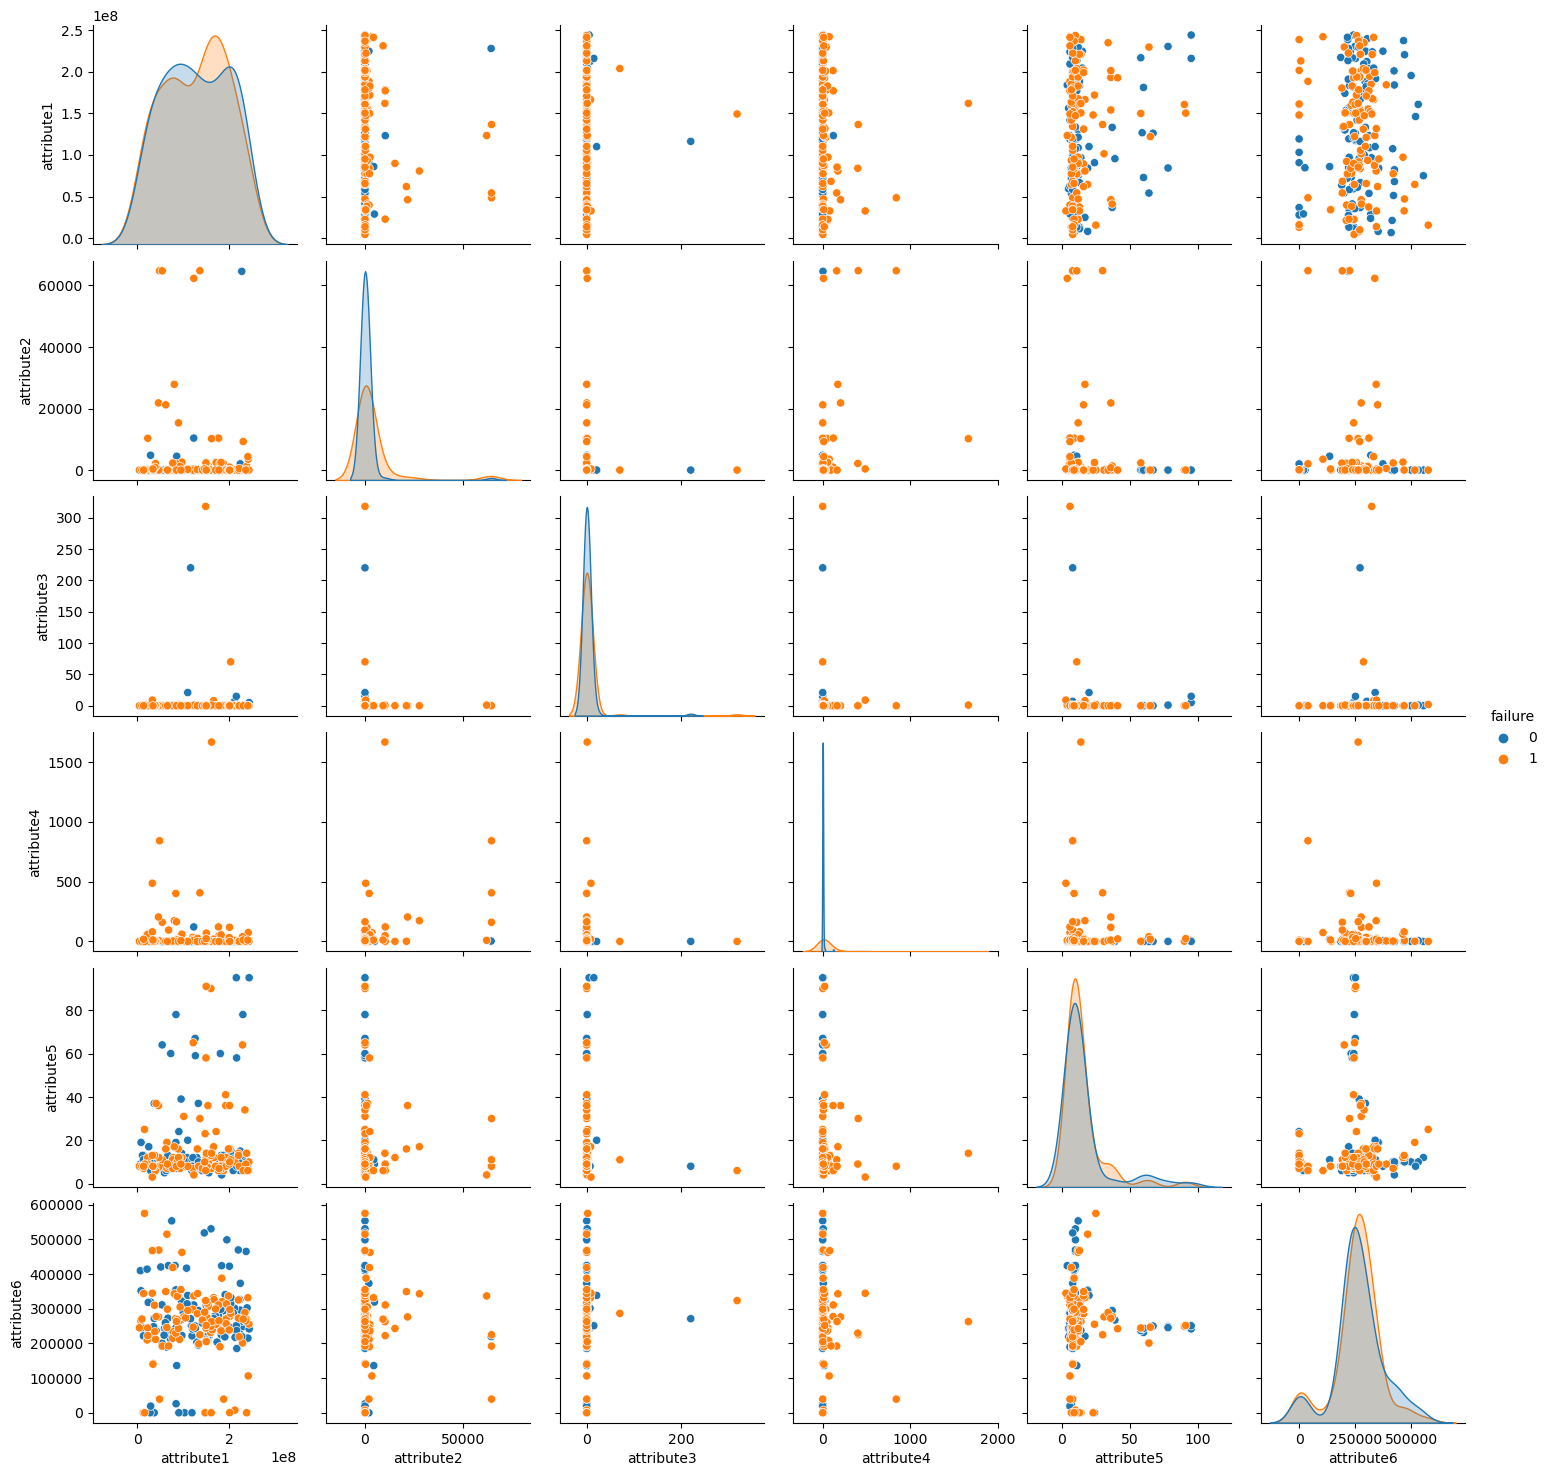

In [23]:

# Create pair plots to visualize relationships between numerical attributes in the under-sampled dataset
sns.pairplot(under_sample, hue='failure', vars=['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6'])


Text(0.5, 1.0, 'Failure over Time by Month')

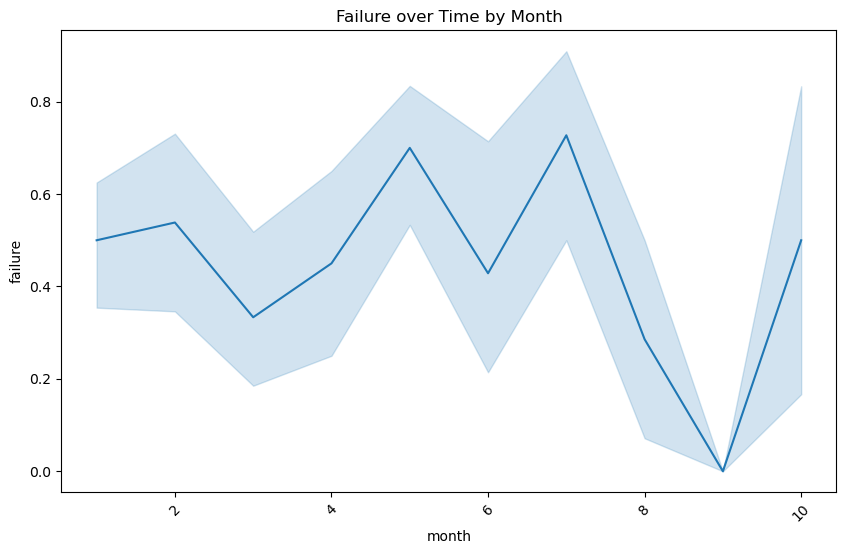

In [24]:
# Create a line plot to visualize 'failure' over time by month in the under-sampled dataset
plt.figure(figsize=(10, 6))
sns.lineplot(data=under_sample, x='month', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Month")



Text(0.5, 1.0, 'Failure over Time by Week')

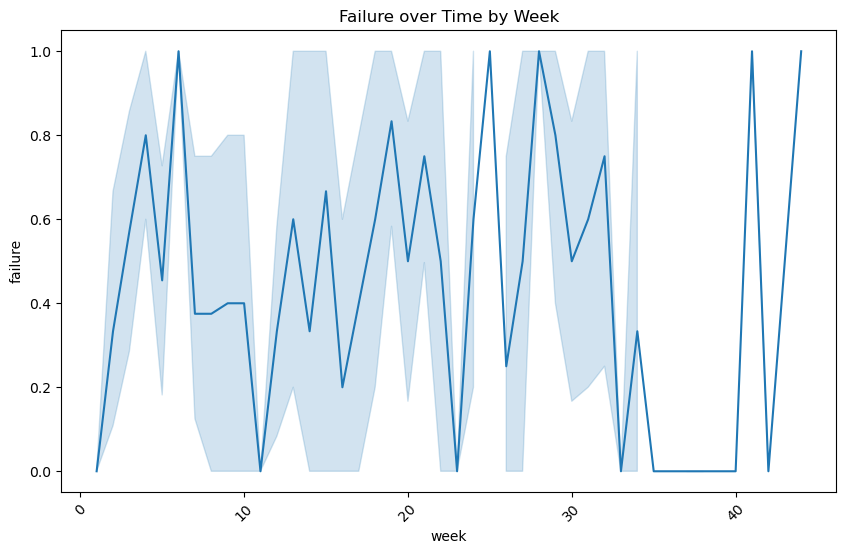

In [25]:

# Convert the 'week' column to an integer for better visualization
under_sample['week'] = under_sample['week'].astype(int)

# Create a line plot to visualize 'failure' over time by week in the under-sampled dataset
plt.figure(figsize=(10, 6))
sns.lineplot(data=under_sample, x='week', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Week")


Text(0.5, 1.0, 'Correlation Matrix')

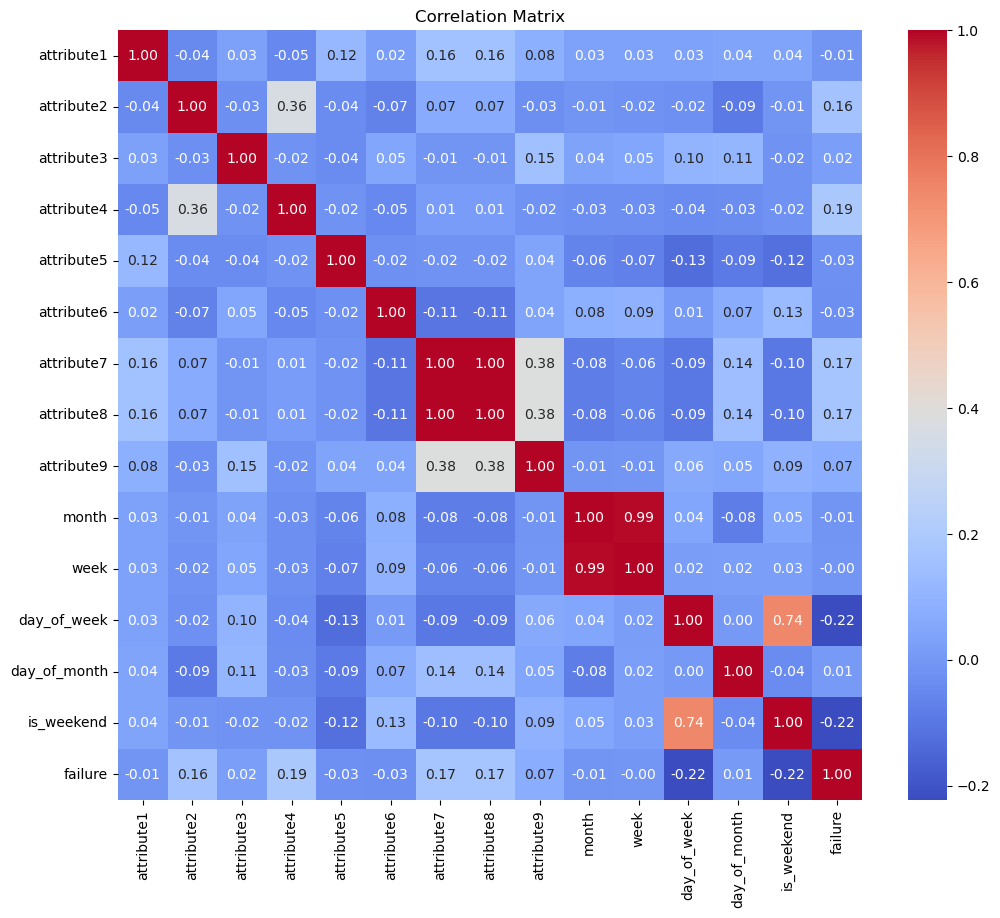

In [26]:

# Select only numeric columns for the correlation matrix
numeric_cols = under_sample.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical attributes in the under-sampled dataset
correlation_matrix = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")


Text(0.5, 1.0, "Distribution of 'failure'")

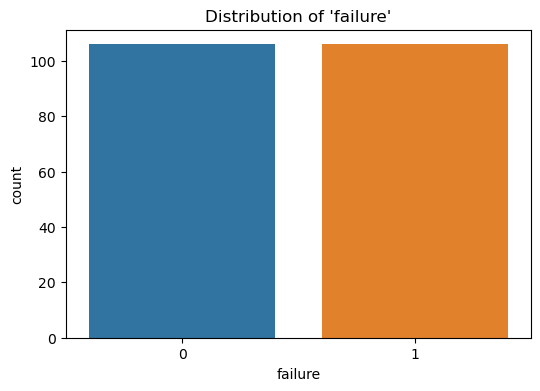

In [27]:

# Create a countplot to visualize the distribution of 'failure' in the under-sampled dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=under_sample, x='failure')
plt.title("Distribution of 'failure'")


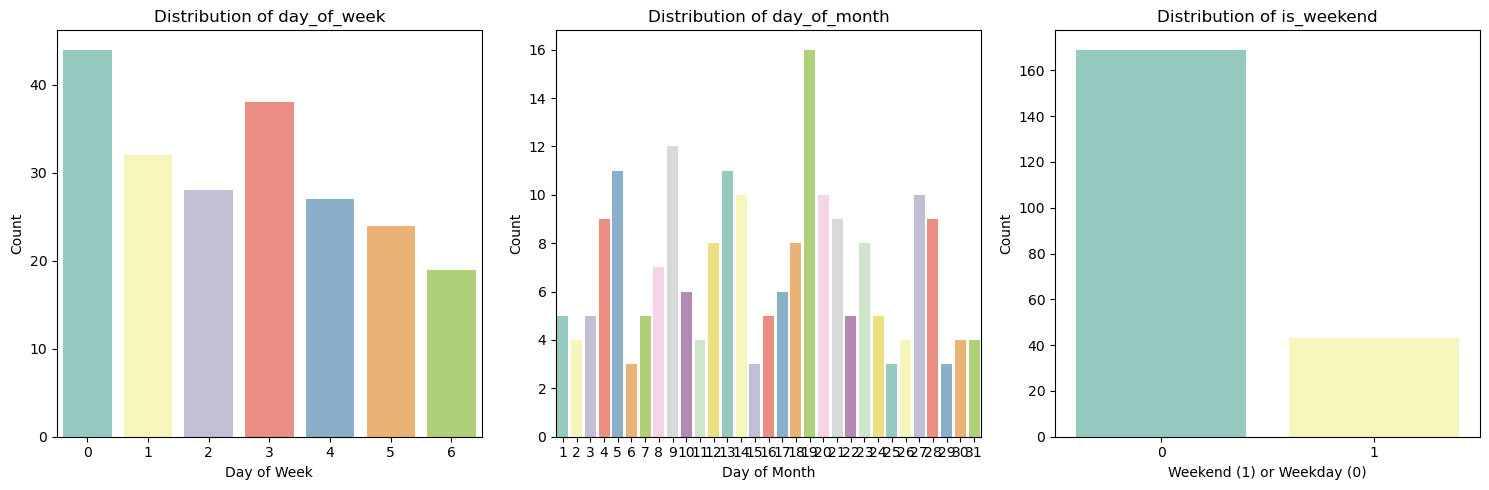

In [28]:

# Create subplots to visualize the distribution of 'day_of_week', 'day_of_month', and 'is_weekend' in the under-sampled dataset
plt.figure(figsize=(15, 5))

# Distribution of 'day_of_week'
plt.subplot(131)
sns.countplot(data=under_sample, x='day_of_week', palette='Set3')
plt.title("Distribution of day_of_week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

# Distribution of 'day_of_month'
plt.subplot(132)
sns.countplot(data=under_sample, x='day_of_month', palette='Set3')
plt.title("Distribution of day_of_month")
plt.xlabel("Day of Month")
plt.ylabel ("Count")

# Distribution of 'is_weekend'
plt.subplot(133)
sns.countplot(data=under_sample, x='is_weekend', palette='Set3')
plt.title("Distribution of is_weekend")
plt.xlabel("Weekend (1) or Weekday (0)")
plt.ylabel("Count")

# Adjust the layout and display the subplots
plt.tight_layout()
plt.show()

In [29]:
# Import the necessary libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create feature matrix 'X_norm' and target variable 'y_norm'
X_norm = under_sample.drop(['failure'], axis=1)
y_norm = under_sample['failure']

# Split the data into training and testing sets
x_train, x_test, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)



attribute7: 0.0835
attribute1: 0.0820
day_of_month: 0.0766
attribute5: 0.0615
month: 0.0561
day_of_week: 0.0482
attribute9: 0.0384
attribute3: 0.0168
is_weekend: 0.0119


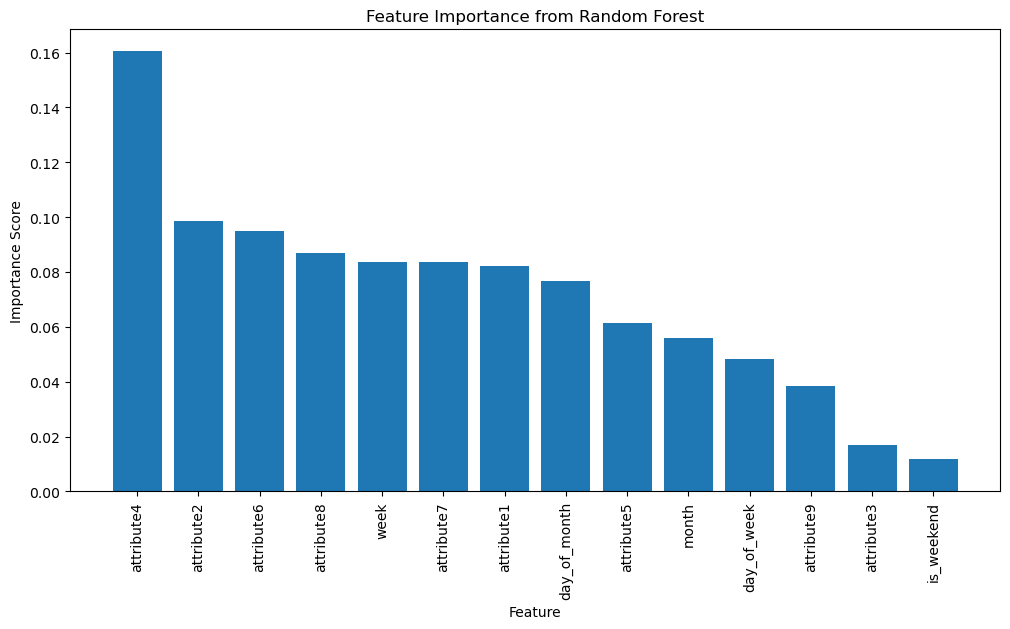

In [30]:

# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Step 1: Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_norm, y_train_norm)

# Step 2: Retrieve feature importances
feature_importances = rf_classifier.feature_importances_

# Step 3: Select the most important features
# You can choose a threshold or select the top k features
# For example, let's select the top 5 most important features
deep_n = 5
top_feature_indices = feature_importances.argsort()[::-1][deep_n:]

# Get the names of the selected features
selected_features = x_train.columns[top_feature_indices]

# Print the selected feature names and their importance scores
for feature, importance in zip(selected_features, feature_importances[top_feature_indices]):
    print(f"{feature}: {importance:.4f}")

# Get feature importances and feature names
feature_importances = rf_classifier.feature_importances_
feature_names = x_train.columns

# Sort features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Sort feature names and importances accordingly
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance from Random Forest")
plt.show()


In [31]:

# Create a new DataFrame 'under_sample_fs' by dropping selected features
under_sample_fs = under_sample.drop(["attribute3", "attribute9", "is_weekend"], axis=1)

# Create feature matrix 'X_fs' and target variable 'y_fs' from 'under_sample_fs'
X_fs = under_sample_fs.drop(['failure'], axis=1)
y_fs = under_sample_fs['failure']

# Split the data into training and testing sets for the new feature set
x_train, x_test, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

# Standardize the features for the new feature set
scaler = StandardScaler()
x_train_fs = scaler.fit_transform(x_train)
x_test_fs = scaler.transform(x_test)


we can reduce the dimensions by dropping features which has importance score less than 0.04

In [32]:

# Import various classification algorithms and evaluation metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate multiple classifiers and return a DataFrame with metrics
def evaluate_model(x_train, y_train, x_test, y_test):
    # Define a list of classifiers
    classifiers = [
        GaussianNB(),
        BernoulliNB(),
        KNeighborsClassifier(),
        SVC(),
        DecisionTreeClassifier(),
        LogisticRegression(),
        SGDClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier()
    ]

    # Define the names of classifiers
    classifier_names = [
        'GaussianNB',
        'BernoulliNB',
        'KNeighbors',
        'SVC',
        'DecisionTree',
        'LogisticRegression',
        'SGD',
        'GradientBoost',
        'RandomForest',
        'AdaBoost',
        'ExtraTrees'
    ]

    # Create an empty DataFrame for metrics
    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=classifier_names)

    # Evaluate each classifier and store the metrics
    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics.loc[classifier_names[i], 'Accuracy'] = accuracy
        metrics.loc[classifier_names[i], 'Precision'] = precision
        metrics.loc[classifier_names[i], 'Recall'] = recall
        metrics.loc[classifier_names[i], 'F1'] = f1

    # Sort the metrics by accuracy in descending order
    metrics = metrics.sort_values(by='Accuracy', ascending=False)

    return metrics

# Step 4: Evaluate models using both feature sets
metrics_norm = evaluate_model(x_train_norm, y_train_norm, x_test_norm, y_test_norm)
metrics_fs = evaluate_model(x_train_fs, y_train_fs, x_test_fs, y_test_fs)

In [33]:
metrics_norm

,Accuracy,Precision,Recall,F1
GradientBoost,0.813953,0.863636,0.791667,0.826087
SGD,0.790698,0.777778,0.875,0.823529
RandomForest,0.790698,0.826087,0.791667,0.808511
ExtraTrees,0.744186,0.842105,0.666667,0.744186
DecisionTree,0.72093,0.75,0.75,0.75
AdaBoost,0.72093,0.8,0.666667,0.727273
KNeighbors,0.651163,0.736842,0.583333,0.651163
BernoulliNB,0.604651,0.888889,0.333333,0.484848
LogisticRegression,0.604651,0.888889,0.333333,0.484848
SVC,0.581395,0.8,0.333333,0.470588


In [34]:
metrics_fs

,Accuracy,Precision,Recall,F1
GradientBoost,0.860465,0.909091,0.833333,0.869565
RandomForest,0.790698,0.857143,0.75,0.8
AdaBoost,0.767442,0.818182,0.75,0.782609
ExtraTrees,0.767442,0.888889,0.666667,0.761905
DecisionTree,0.697674,0.73913,0.708333,0.723404
BernoulliNB,0.604651,1.0,0.291667,0.451613
KNeighbors,0.604651,0.666667,0.583333,0.622222
LogisticRegression,0.604651,0.888889,0.333333,0.484848
SGD,0.604651,0.64,0.666667,0.653061
SVC,0.55814,0.857143,0.25,0.387097


feature selection gives more better results then I will contunie with fs

I will search hyper parameters for only  models which has more than 70 accuracy

In [35]:
#pip install optuna

In [36]:
import optuna

# GradientBoosting

In [60]:
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
    }

    # Initialize the classifier with hyperparameters
    clf = GradientBoostingClassifier(**params, random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train_fs, y_train_fs)
    
    # Make predictions on the test data
    y_pred = clf.predict(x_test_fs)
    
    # Calculate accuracy as the objective to maximize
    accuracy = accuracy_score(y_test_fs, y_pred)
    

    return accuracy


In [61]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy

# Run the optimization
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters from the study
best_params = study.best_params
best_accuracy = study.best_value

print(f'Best hyperparameters: {best_params}')
print(f'Best accuracy: {best_accuracy}')

[I 2023-11-03 16:41:37,779] A new study created in memory with name: no-name-2f349f55-3daa-4a88-b1d1-c4bfeb8fa0a3
[I 2023-11-03 16:41:38,315] Trial 0 finished with value: 0.7441860465116279 and parameters: {'n_estimators': 398, 'learning_rate': 0.2547775996820704, 'max_depth': 8, 'min_samples_split': 0.3998285519933038}. Best is trial 0 with value: 0.7441860465116279.
[I 2023-11-03 16:41:38,677] Trial 1 finished with value: 0.7209302325581395 and parameters: {'n_estimators': 425, 'learning_rate': 0.06678024209578282, 'max_depth': 7, 'min_samples_split': 0.6872095743229396}. Best is trial 0 with value: 0.7441860465116279.
[I 2023-11-03 16:41:39,021] Trial 2 finished with value: 0.7209302325581395 and parameters: {'n_estimators': 324, 'learning_rate': 0.2076146736898721, 'max_depth': 5, 'min_samples_split': 0.5115480048677935}. Best is trial 0 with value: 0.7441860465116279.
[I 2023-11-03 16:41:39,117] Trial 3 finished with value: 0.8837209302325582 and parameters: {'n_estimators': 52, '

[I 2023-11-03 16:41:45,505] Trial 32 finished with value: 0.8837209302325582 and parameters: {'n_estimators': 75, 'learning_rate': 0.12881405117571926, 'max_depth': 4, 'min_samples_split': 0.1711169810381895}. Best is trial 3 with value: 0.8837209302325582.
[I 2023-11-03 16:41:45,637] Trial 33 finished with value: 0.8604651162790697 and parameters: {'n_estimators': 75, 'learning_rate': 0.10731521457213006, 'max_depth': 5, 'min_samples_split': 0.224794701628149}. Best is trial 3 with value: 0.8837209302325582.
[I 2023-11-03 16:41:45,720] Trial 34 finished with value: 0.8837209302325582 and parameters: {'n_estimators': 50, 'learning_rate': 0.2272283912307839, 'max_depth': 4, 'min_samples_split': 0.14117454217711486}. Best is trial 3 with value: 0.8837209302325582.
[I 2023-11-03 16:41:45,833] Trial 35 finished with value: 0.7441860465116279 and parameters: {'n_estimators': 83, 'learning_rate': 0.226056275446231, 'max_depth': 4, 'min_samples_split': 0.26923130700036113}. Best is trial 3 wi

[I 2023-11-03 16:41:50,709] Trial 64 finished with value: 0.7674418604651163 and parameters: {'n_estimators': 79, 'learning_rate': 0.2853829716023697, 'max_depth': 4, 'min_samples_split': 0.20956976522350496}. Best is trial 3 with value: 0.8837209302325582.
[I 2023-11-03 16:41:50,812] Trial 65 finished with value: 0.8372093023255814 and parameters: {'n_estimators': 66, 'learning_rate': 0.1389208212994482, 'max_depth': 4, 'min_samples_split': 0.14484293343895246}. Best is trial 3 with value: 0.8837209302325582.
[I 2023-11-03 16:41:50,903] Trial 66 finished with value: 0.8372093023255814 and parameters: {'n_estimators': 50, 'learning_rate': 0.1479159322480552, 'max_depth': 5, 'min_samples_split': 0.1807916510747763}. Best is trial 3 with value: 0.8837209302325582.
[I 2023-11-03 16:41:51,409] Trial 67 finished with value: 0.7674418604651163 and parameters: {'n_estimators': 403, 'learning_rate': 0.13489040871113248, 'max_depth': 4, 'min_samples_split': 0.2719949023818362}. Best is trial 3 

[I 2023-11-03 16:41:56,521] Trial 96 finished with value: 0.8604651162790697 and parameters: {'n_estimators': 89, 'learning_rate': 0.1518026115878875, 'max_depth': 5, 'min_samples_split': 0.1343176939000847}. Best is trial 91 with value: 0.9069767441860465.
[I 2023-11-03 16:41:56,698] Trial 97 finished with value: 0.7906976744186046 and parameters: {'n_estimators': 140, 'learning_rate': 0.1349115185733849, 'max_depth': 4, 'min_samples_split': 0.27484700659271366}. Best is trial 91 with value: 0.9069767441860465.
[I 2023-11-03 16:41:56,787] Trial 98 finished with value: 0.8837209302325582 and parameters: {'n_estimators': 51, 'learning_rate': 0.16346723854469988, 'max_depth': 4, 'min_samples_split': 0.2203556045806556}. Best is trial 91 with value: 0.9069767441860465.
[I 2023-11-03 16:41:56,910] Trial 99 finished with value: 0.813953488372093 and parameters: {'n_estimators': 80, 'learning_rate': 0.16367012616970694, 'max_depth': 4, 'min_samples_split': 0.22389284268031448}. Best is trial

Best hyperparameters: {'n_estimators': 99, 'learning_rate': 0.12797043355479842, 'max_depth': 4, 'min_samples_split': 0.1661773908812067}
Best accuracy: 0.9069767441860465


In [62]:
best_gb_classifier = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Train the classifier on the training data
best_gb_classifier.fit(x_train_fs, y_train_fs)

# Make predictions on the test data
y_pred = best_gb_classifier.predict(x_test_fs)
# Generate a classification report
report = classification_report(y_test_fs, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.95      0.88      0.91        24

    accuracy                           0.91        43
   macro avg       0.91      0.91      0.91        43
weighted avg       0.91      0.91      0.91        43



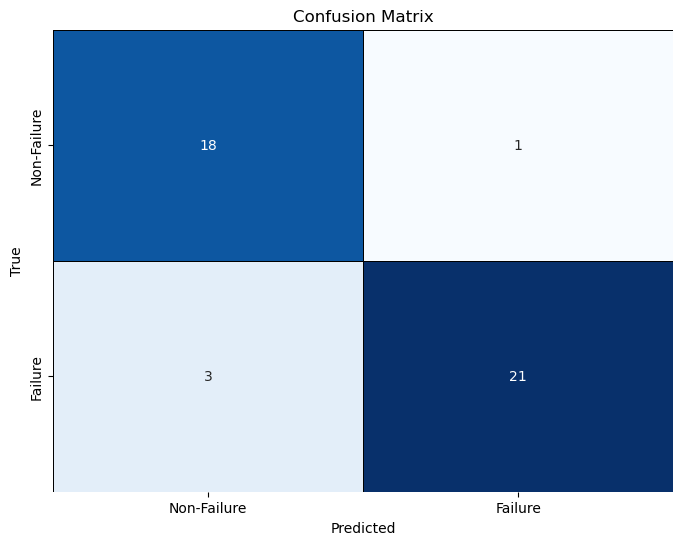

In [63]:

# Assuming you have already calculated the confusion matrix
cm = confusion_matrix(y_test_fs, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", cbar=False, xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# RandomForest

In [64]:
def objective(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_uniform('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_uniform('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['log2', 'sqrt'])  # Only suggest valid options
    
    # Create and train the RandomForestClassifier with the suggested hyperparameters
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    # Train the classifier on the training data
    clf.fit(x_train_fs, y_train_fs)
    
    # Make predictions on the test data
    y_pred = clf.predict(x_test_fs)
    
    # Calculate accuracy as the objective to maximize
    accuracy = accuracy_score(y_test_fs, y_pred)
    
    return accuracy


In [65]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy

# Run the optimization
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters from the study
best_params = study.best_params
best_accuracy = study.best_value

print(f'Best hyperparameters: {best_params}')
print(f'Best accuracy: {best_accuracy}')


[I 2023-11-03 16:41:57,210] A new study created in memory with name: no-name-08aec494-5f57-4887-80ec-1f2675ca5092
[I 2023-11-03 16:41:57,271] Trial 0 finished with value: 0.627906976744186 and parameters: {'n_estimators': 47, 'max_depth': 22, 'min_samples_split': 0.6027377443510092, 'min_samples_leaf': 0.2241929407385892, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.627906976744186.
[I 2023-11-03 16:41:57,334] Trial 1 finished with value: 0.46511627906976744 and parameters: {'n_estimators': 51, 'max_depth': 9, 'min_samples_split': 0.2776789097710818, 'min_samples_leaf': 0.24736357649778432, 'max_features': 'log2'}. Best is trial 0 with value: 0.627906976744186.
[I 2023-11-03 16:41:57,383] Trial 2 finished with value: 0.4418604651162791 and parameters: {'n_estimators': 39, 'max_depth': 16, 'min_samples_split': 0.6689116589745943, 'min_samples_leaf': 0.3529568093983785, 'max_features': 'log2'}. Best is trial 0 with value: 0.627906976744186.
[I 2023-11-03 16:41:57,434] Trial 3 f

[I 2023-11-03 16:42:00,897] Trial 29 finished with value: 0.6511627906976745 and parameters: {'n_estimators': 101, 'max_depth': 21, 'min_samples_split': 0.16105804293831033, 'min_samples_leaf': 0.16058656677982702, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7674418604651163.
[I 2023-11-03 16:42:01,024] Trial 30 finished with value: 0.6511627906976745 and parameters: {'n_estimators': 90, 'max_depth': 13, 'min_samples_split': 0.2344981173983118, 'min_samples_leaf': 0.20020368815777756, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7674418604651163.
[I 2023-11-03 16:42:01,194] Trial 31 finished with value: 0.7674418604651163 and parameters: {'n_estimators': 120, 'max_depth': 11, 'min_samples_split': 0.10370397373963965, 'min_samples_leaf': 0.10061899441406866, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7674418604651163.
[I 2023-11-03 16:42:01,364] Trial 32 finished with value: 0.7209302325581395 and parameters: {'n_estimators': 125, 'max_depth': 9, 'min

[I 2023-11-03 16:42:05,262] Trial 58 finished with value: 0.6744186046511628 and parameters: {'n_estimators': 89, 'max_depth': 10, 'min_samples_split': 0.16888263582367197, 'min_samples_leaf': 0.14295607114649087, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7674418604651163.
[I 2023-11-03 16:42:05,439] Trial 59 finished with value: 0.7674418604651163 and parameters: {'n_estimators': 132, 'max_depth': 30, 'min_samples_split': 0.2188016202369901, 'min_samples_leaf': 0.11080012744366434, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7674418604651163.
[I 2023-11-03 16:42:05,595] Trial 60 finished with value: 0.6511627906976745 and parameters: {'n_estimators': 116, 'max_depth': 31, 'min_samples_split': 0.12775613264347718, 'min_samples_leaf': 0.1642991058200455, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7674418604651163.
[I 2023-11-03 16:42:05,716] Trial 61 finished with value: 0.7209302325581395 and parameters: {'n_estimators': 83, 'max_depth': 17, 'min_

[I 2023-11-03 16:42:09,631] Trial 87 finished with value: 0.7209302325581395 and parameters: {'n_estimators': 125, 'max_depth': 32, 'min_samples_split': 0.10120809415605736, 'min_samples_leaf': 0.12659556643094494, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7674418604651163.
[I 2023-11-03 16:42:09,796] Trial 88 finished with value: 0.7674418604651163 and parameters: {'n_estimators': 120, 'max_depth': 28, 'min_samples_split': 0.14297332400442275, 'min_samples_leaf': 0.11519487381301552, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7674418604651163.
[I 2023-11-03 16:42:09,976] Trial 89 finished with value: 0.6744186046511628 and parameters: {'n_estimators': 137, 'max_depth': 6, 'min_samples_split': 0.2178711497635325, 'min_samples_leaf': 0.15364739611341025, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7674418604651163.
[I 2023-11-03 16:42:10,113] Trial 90 finished with value: 0.6511627906976745 and parameters: {'n_estimators': 98, 'max_depth': 3, 'min_

Best hyperparameters: {'n_estimators': 104, 'max_depth': 32, 'min_samples_split': 0.10589792048753244, 'min_samples_leaf': 0.11702287595352462, 'max_features': 'sqrt'}
Best accuracy: 0.7674418604651163


In [66]:
# Train the final RandomForestClassifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)
best_rf_classifier.fit(x_train_fs, y_train_fs)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(x_test_fs)
# Generate a classification report
report = classification_report(y_test_fs, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.68      0.89      0.77        19
           1       0.89      0.67      0.76        24

    accuracy                           0.77        43
   macro avg       0.78      0.78      0.77        43
weighted avg       0.80      0.77      0.77        43



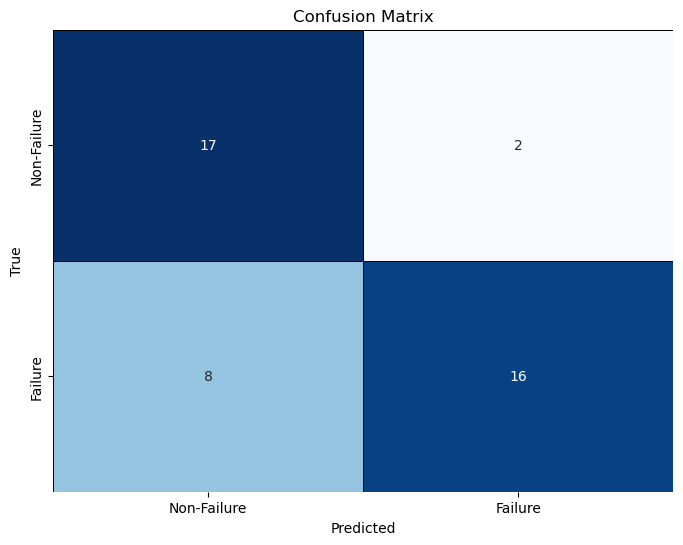

In [67]:

# Assuming you have already calculated the confusion matrix
cm = confusion_matrix(y_test_fs, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", cbar=False, xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# AdaBoost

In [68]:
# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int("n_estimators", 50, 200)  # Number of weak learners
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0)  # Learning rate
    algorithm = trial.suggest_categorical("algorithm", ["SAMME", "SAMME.R"])  # AdaBoost algorithm

    # Create an AdaBoostClassifier with the suggested hyperparameters
    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=42
    )

    # Train the model
    model.fit(x_train_fs, y_train_fs)

    # Make predictions on the validation set
    y_pred = model.predict(x_test_fs)

    # Calculate accuracy (you can use other metrics as needed)
    accuracy = accuracy_score(y_test_fs, y_pred)

    return accuracy


In [69]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy

# Run the optimization
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters from the study
best_params = study.best_params
best_accuracy = study.best_value

print(f'Best hyperparameters: {best_params}')
print(f'Best accuracy: {best_accuracy}')


[I 2023-11-03 16:42:11,807] A new study created in memory with name: no-name-45050ab6-b5da-443f-9205-9716747ed114
[I 2023-11-03 16:42:11,953] Trial 0 finished with value: 0.7209302325581395 and parameters: {'n_estimators': 94, 'learning_rate': 0.33520736869178874, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.7209302325581395.
[I 2023-11-03 16:42:12,225] Trial 1 finished with value: 0.7674418604651163 and parameters: {'n_estimators': 183, 'learning_rate': 0.7728457248465497, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.7674418604651163.
[I 2023-11-03 16:42:12,430] Trial 2 finished with value: 0.7674418604651163 and parameters: {'n_estimators': 138, 'learning_rate': 0.09918483854419677, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.7674418604651163.
[I 2023-11-03 16:42:12,625] Trial 3 finished with value: 0.7674418604651163 and parameters: {'n_estimators': 124, 'learning_rate': 0.26269976706535897, 'algorithm': 'SAMME.R'}. Best is trial 1 with value: 0.767441860465

[I 2023-11-03 16:42:18,105] Trial 37 finished with value: 0.7209302325581395 and parameters: {'n_estimators': 75, 'learning_rate': 0.8113907609415126, 'algorithm': 'SAMME.R'}. Best is trial 5 with value: 0.8372093023255814.
[I 2023-11-03 16:42:18,363] Trial 38 finished with value: 0.7906976744186046 and parameters: {'n_estimators': 170, 'learning_rate': 0.8270445809069997, 'algorithm': 'SAMME'}. Best is trial 5 with value: 0.8372093023255814.
[I 2023-11-03 16:42:18,510] Trial 39 finished with value: 0.7441860465116279 and parameters: {'n_estimators': 87, 'learning_rate': 0.7607457235898039, 'algorithm': 'SAMME.R'}. Best is trial 5 with value: 0.8372093023255814.
[I 2023-11-03 16:42:18,695] Trial 40 finished with value: 0.7674418604651163 and parameters: {'n_estimators': 113, 'learning_rate': 0.8936052928553344, 'algorithm': 'SAMME.R'}. Best is trial 5 with value: 0.8372093023255814.
[I 2023-11-03 16:42:18,860] Trial 41 finished with value: 0.7441860465116279 and parameters: {'n_estimat

[I 2023-11-03 16:42:22,968] Trial 74 finished with value: 0.7441860465116279 and parameters: {'n_estimators': 83, 'learning_rate': 0.7405652889237955, 'algorithm': 'SAMME.R'}. Best is trial 5 with value: 0.8372093023255814.
[I 2023-11-03 16:42:23,066] Trial 75 finished with value: 0.7441860465116279 and parameters: {'n_estimators': 54, 'learning_rate': 0.8011546146587251, 'algorithm': 'SAMME.R'}. Best is trial 5 with value: 0.8372093023255814.
[I 2023-11-03 16:42:23,377] Trial 76 finished with value: 0.6744186046511628 and parameters: {'n_estimators': 197, 'learning_rate': 0.8800905226517141, 'algorithm': 'SAMME.R'}. Best is trial 5 with value: 0.8372093023255814.
[I 2023-11-03 16:42:23,493] Trial 77 finished with value: 0.813953488372093 and parameters: {'n_estimators': 67, 'learning_rate': 0.8461971621309607, 'algorithm': 'SAMME.R'}. Best is trial 5 with value: 0.8372093023255814.
[I 2023-11-03 16:42:23,622] Trial 78 finished with value: 0.7441860465116279 and parameters: {'n_estimat

Best hyperparameters: {'n_estimators': 108, 'learning_rate': 0.9903598603167872, 'algorithm': 'SAMME.R'}
Best accuracy: 0.8372093023255814


In [70]:
# Train the final AdaBoost model with the best hyperparameters
best_n_estimators = best_params["n_estimators"]
best_learning_rate = best_params["learning_rate"]
best_algorithm = best_params["algorithm"]
final_model = AdaBoostClassifier(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    algorithm=best_algorithm,
    random_state=42
)
final_model.fit(x_train_fs, y_train_fs)

# Make predictions on the test set
y_pred = final_model.predict(x_test_fs)
# Generate a classification report
report = classification_report(y_test_fs, y_pred)
print(report)



              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.90      0.79      0.84        24

    accuracy                           0.84        43
   macro avg       0.84      0.84      0.84        43
weighted avg       0.85      0.84      0.84        43



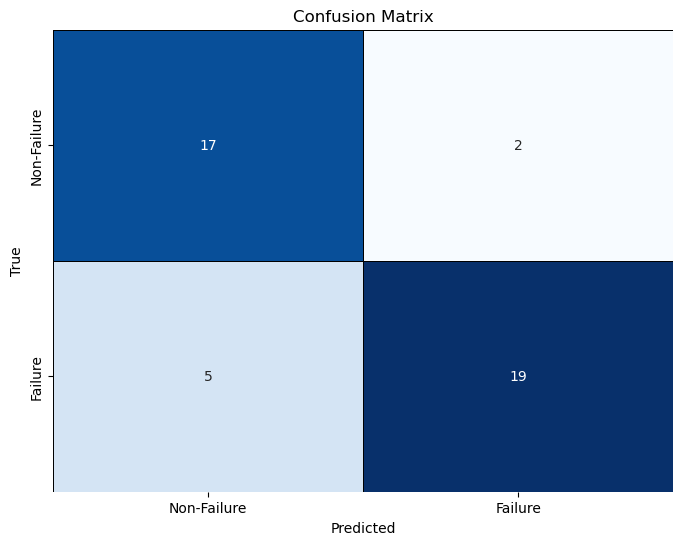

In [71]:

# Assuming you have already calculated the confusion matrix
cm = confusion_matrix(y_test_fs, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", cbar=False, xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ExtraTrees

In [72]:
import optuna
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 32)
    min_samples_split = trial.suggest_float("min_samples_split", 0.1, 1.0)
    min_samples_leaf = trial.suggest_float("min_samples_leaf", 0.1, 0.5)

    # Create an ExtraTrees classifier with the suggested hyperparameters
    clf = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42  # You can set a random seed for reproducibility
    )

    # Fit the classifier on the training data
    clf.fit(x_train_fs, y_train_fs)

    # Make predictions on the test data
    y_pred = clf.predict(x_test_fs)

    # Calculate accuracy as the objective to optimize
    accuracy = accuracy_score(y_test_fs, y_pred)

    return accuracy



In [73]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy

# Run the optimization
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters from the study
best_params = study.best_params
best_accuracy = study.best_value

print(f'Best hyperparameters: {best_params}')
print(f'Best accuracy: {best_accuracy}')


[I 2023-11-03 16:42:26,343] A new study created in memory with name: no-name-4d6d046a-efbb-4563-8f8f-2707f32676dd
[I 2023-11-03 16:42:26,595] Trial 0 finished with value: 0.5581395348837209 and parameters: {'n_estimators': 291, 'max_depth': 4, 'min_samples_split': 0.5197206239373099, 'min_samples_leaf': 0.12438830700748418}. Best is trial 0 with value: 0.5581395348837209.
[I 2023-11-03 16:42:27,035] Trial 1 finished with value: 0.4883720930232558 and parameters: {'n_estimators': 531, 'max_depth': 9, 'min_samples_split': 0.64076078212264, 'min_samples_leaf': 0.20168618616750913}. Best is trial 0 with value: 0.5581395348837209.
[I 2023-11-03 16:42:27,669] Trial 2 finished with value: 0.4418604651162791 and parameters: {'n_estimators': 768, 'max_depth': 6, 'min_samples_split': 0.5518681149340747, 'min_samples_leaf': 0.4175089858672565}. Best is trial 0 with value: 0.5581395348837209.
[I 2023-11-03 16:42:27,923] Trial 3 finished with value: 0.4418604651162791 and parameters: {'n_estimators

[I 2023-11-03 16:42:43,719] Trial 31 finished with value: 0.6511627906976745 and parameters: {'n_estimators': 601, 'max_depth': 15, 'min_samples_split': 0.25108523806916117, 'min_samples_leaf': 0.1046428351342423}. Best is trial 31 with value: 0.6511627906976745.
[I 2023-11-03 16:42:44,162] Trial 32 finished with value: 0.5813953488372093 and parameters: {'n_estimators': 515, 'max_depth': 12, 'min_samples_split': 0.2590320897720887, 'min_samples_leaf': 0.11705078478306322}. Best is trial 31 with value: 0.6511627906976745.
[I 2023-11-03 16:42:44,657] Trial 33 finished with value: 0.6511627906976745 and parameters: {'n_estimators': 579, 'max_depth': 16, 'min_samples_split': 0.198981563284952, 'min_samples_leaf': 0.1014170675379211}. Best is trial 31 with value: 0.6511627906976745.
[I 2023-11-03 16:42:45,072] Trial 34 finished with value: 0.5348837209302325 and parameters: {'n_estimators': 483, 'max_depth': 17, 'min_samples_split': 0.17874033402703254, 'min_samples_leaf': 0.15763971010819

[I 2023-11-03 16:42:59,092] Trial 63 finished with value: 0.6046511627906976 and parameters: {'n_estimators': 652, 'max_depth': 27, 'min_samples_split': 0.10020571986994456, 'min_samples_leaf': 0.11440385484632057}. Best is trial 31 with value: 0.6511627906976745.
[I 2023-11-03 16:42:59,549] Trial 64 finished with value: 0.5348837209302325 and parameters: {'n_estimators': 535, 'max_depth': 28, 'min_samples_split': 0.16791863045241606, 'min_samples_leaf': 0.1414868282347298}. Best is trial 31 with value: 0.6511627906976745.
[I 2023-11-03 16:42:59,948] Trial 65 finished with value: 0.6046511627906976 and parameters: {'n_estimators': 459, 'max_depth': 24, 'min_samples_split': 0.21582564559196551, 'min_samples_leaf': 0.11247475439174641}. Best is trial 31 with value: 0.6511627906976745.
[I 2023-11-03 16:43:00,413] Trial 66 finished with value: 0.5581395348837209 and parameters: {'n_estimators': 505, 'max_depth': 30, 'min_samples_split': 0.1426920162472058, 'min_samples_leaf': 0.12675306321

[I 2023-11-03 16:43:14,220] Trial 95 finished with value: 0.5581395348837209 and parameters: {'n_estimators': 606, 'max_depth': 16, 'min_samples_split': 0.19385546331806258, 'min_samples_leaf': 0.12959029258017787}. Best is trial 31 with value: 0.6511627906976745.
[I 2023-11-03 16:43:14,791] Trial 96 finished with value: 0.6046511627906976 and parameters: {'n_estimators': 668, 'max_depth': 15, 'min_samples_split': 0.2257987396152922, 'min_samples_leaf': 0.11026893749497044}. Best is trial 31 with value: 0.6511627906976745.
[I 2023-11-03 16:43:15,295] Trial 97 finished with value: 0.5348837209302325 and parameters: {'n_estimators': 580, 'max_depth': 11, 'min_samples_split': 0.10572864614205876, 'min_samples_leaf': 0.15257394462270812}. Best is trial 31 with value: 0.6511627906976745.
[I 2023-11-03 16:43:15,773] Trial 98 finished with value: 0.5813953488372093 and parameters: {'n_estimators': 550, 'max_depth': 13, 'min_samples_split': 0.2584673122771188, 'min_samples_leaf': 0.10859453866

Best hyperparameters: {'n_estimators': 601, 'max_depth': 15, 'min_samples_split': 0.25108523806916117, 'min_samples_leaf': 0.1046428351342423}
Best accuracy: 0.6511627906976745


In [74]:
# Train the final ExtraTrees model with the best hyperparameters
best_n_estimators = best_params["n_estimators"]
best_max_depth = best_params["max_depth"]
best_min_samples_split = best_params["min_samples_split"]
best_min_samples_leaf = best_params["min_samples_leaf"]

final_model = ExtraTreesClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)
final_model.fit(x_train_fs, y_train_fs)

# Make predictions on the test set
y_pred = final_model.predict(x_test_fs)
# Generate a classification report
report = classification_report(y_test_fs, y_pred)
print(report)



              precision    recall  f1-score   support

           0       0.56      1.00      0.72        19
           1       1.00      0.38      0.55        24

    accuracy                           0.65        43
   macro avg       0.78      0.69      0.63        43
weighted avg       0.81      0.65      0.62        43



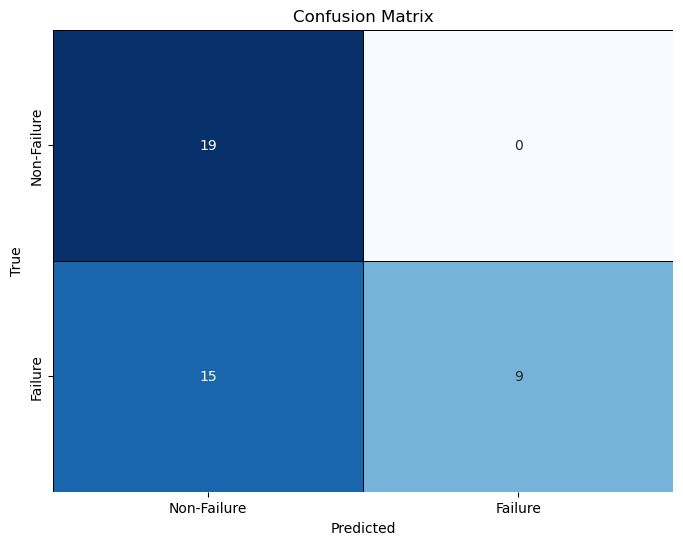

In [75]:

# Assuming you have already calculated the confusion matrix
cm = confusion_matrix(y_test_fs, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", cbar=False, xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree

In [92]:
# Define the objective function to optimize
def objective(trial):
    # Define hyperparameters to search and their respective ranges
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_uniform('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_uniform('min_samples_leaf', 0.1, 0.5)

    # Create a DecisionTree classifier with the suggested hyperparameters
    clf = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42  # Set a random state for reproducibility
    )

    # Fit the classifier on the training data
    clf.fit(x_train_fs, y_train_fs)

    # Make predictions on the test data
    y_pred = clf.predict(x_test_fs)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test_fs, y_pred)

    return accuracy



In [93]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy

# Run the optimization
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters from the study
best_params = study.best_params
best_accuracy = study.best_value

print(f'Best hyperparameters: {best_params}')
print(f'Best accuracy: {best_accuracy}')


[I 2023-11-03 16:44:14,300] A new study created in memory with name: no-name-05135032-a85a-4de2-be7b-5ab24fb00476
[I 2023-11-03 16:44:14,305] Trial 0 finished with value: 0.6511627906976745 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 0.902868509928301, 'min_samples_leaf': 0.31591789150228455}. Best is trial 0 with value: 0.6511627906976745.
[I 2023-11-03 16:44:14,309] Trial 1 finished with value: 0.5116279069767442 and parameters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 0.890033170207253, 'min_samples_leaf': 0.37827595104326994}. Best is trial 0 with value: 0.6511627906976745.
[I 2023-11-03 16:44:14,313] Trial 2 finished with value: 0.6511627906976745 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 0.7384771066219263, 'min_samples_leaf': 0.17592172993167754}. Best is trial 0 with value: 0.6511627906976745.
[I 2023-11-03 16:44:14,317] Trial 3 finished with value: 0.5116279069767442 and parameters: {'cri

[I 2023-11-03 16:44:14,719] Trial 31 finished with value: 0.6511627906976745 and parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 0.1350166111324812, 'min_samples_leaf': 0.13120453860183606}. Best is trial 23 with value: 0.6744186046511628.
[I 2023-11-03 16:44:14,735] Trial 32 finished with value: 0.6511627906976745 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 0.11780868490450104, 'min_samples_leaf': 0.15234516902553885}. Best is trial 23 with value: 0.6744186046511628.
[I 2023-11-03 16:44:14,751] Trial 33 finished with value: 0.6511627906976745 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 0.10236383633705297, 'min_samples_leaf': 0.19777315426737924}. Best is trial 23 with value: 0.6744186046511628.
[I 2023-11-03 16:44:14,772] Trial 34 finished with value: 0.6511627906976745 and parameters: {'criterion': 'gini', 'max_depth': 21, 'min_samples_split': 0.18683191936864746, 'min_samples_leaf': 0.1

[I 2023-11-03 16:44:15,254] Trial 62 finished with value: 0.6511627906976745 and parameters: {'criterion': 'gini', 'max_depth': 29, 'min_samples_split': 0.9782844036612722, 'min_samples_leaf': 0.29616218771475084}. Best is trial 23 with value: 0.6744186046511628.
[I 2023-11-03 16:44:15,270] Trial 63 finished with value: 0.6511627906976745 and parameters: {'criterion': 'gini', 'max_depth': 32, 'min_samples_split': 0.8840617391607952, 'min_samples_leaf': 0.23262674286798846}. Best is trial 23 with value: 0.6744186046511628.
[I 2023-11-03 16:44:15,286] Trial 64 finished with value: 0.6511627906976745 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 0.8541718433368992, 'min_samples_leaf': 0.1233824189592301}. Best is trial 23 with value: 0.6744186046511628.
[I 2023-11-03 16:44:15,302] Trial 65 finished with value: 0.6511627906976745 and parameters: {'criterion': 'gini', 'max_depth': 22, 'min_samples_split': 0.9163103637197934, 'min_samples_leaf': 0.24646643246101

[I 2023-11-03 16:44:15,791] Trial 93 finished with value: 0.6511627906976745 and parameters: {'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 0.9970247756058193, 'min_samples_leaf': 0.25744645016219336}. Best is trial 23 with value: 0.6744186046511628.
[I 2023-11-03 16:44:15,810] Trial 94 finished with value: 0.6511627906976745 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 0.9664345649613436, 'min_samples_leaf': 0.11364505917571517}. Best is trial 23 with value: 0.6744186046511628.
[I 2023-11-03 16:44:15,826] Trial 95 finished with value: 0.6511627906976745 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 0.9283836487453443, 'min_samples_leaf': 0.16906707700434917}. Best is trial 23 with value: 0.6744186046511628.
[I 2023-11-03 16:44:15,843] Trial 96 finished with value: 0.6511627906976745 and parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 0.5120368575252602, 'min_samples_leaf': 0.29022

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 0.11130263609293957, 'min_samples_leaf': 0.10500598401125465}
Best accuracy: 0.6744186046511628


In [94]:
best_criterion = best_params["criterion"]
best_max_depth = best_params["max_depth"]
best_min_samples_split = best_params["min_samples_split"]
best_min_samples_leaf = best_params["min_samples_leaf"]

# Create the final DecisionTree model with the best hyperparameters
final_decision_tree = DecisionTreeClassifier(
    criterion=best_criterion,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)

# Fit the final DecisionTree model on the training data
final_decision_tree.fit(x_train_fs, y_train_fs)

# Make predictions on the test set
y_pred = final_decision_tree.predict(x_test_fs)
# Generate a classification report
report = classification_report(y_test_fs, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.61      0.74      0.67        19
           1       0.75      0.62      0.68        24

    accuracy                           0.67        43
   macro avg       0.68      0.68      0.67        43
weighted avg       0.69      0.67      0.68        43



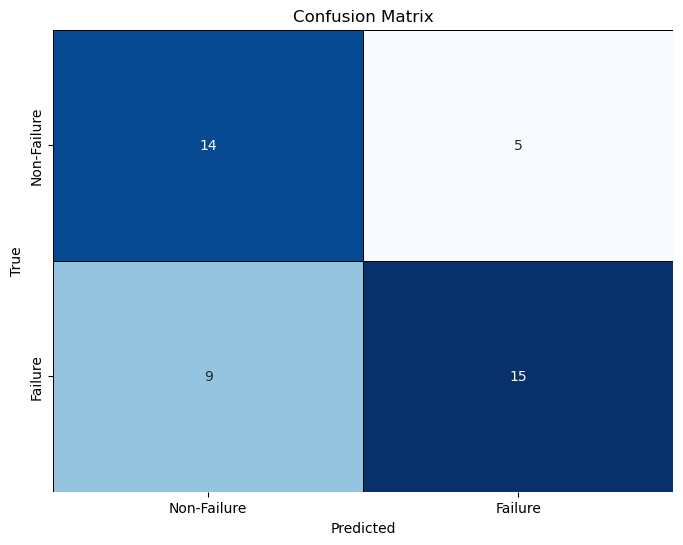

In [95]:

# Assuming you have already calculated the confusion matrix
cm = confusion_matrix(y_test_fs, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", cbar=False, xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

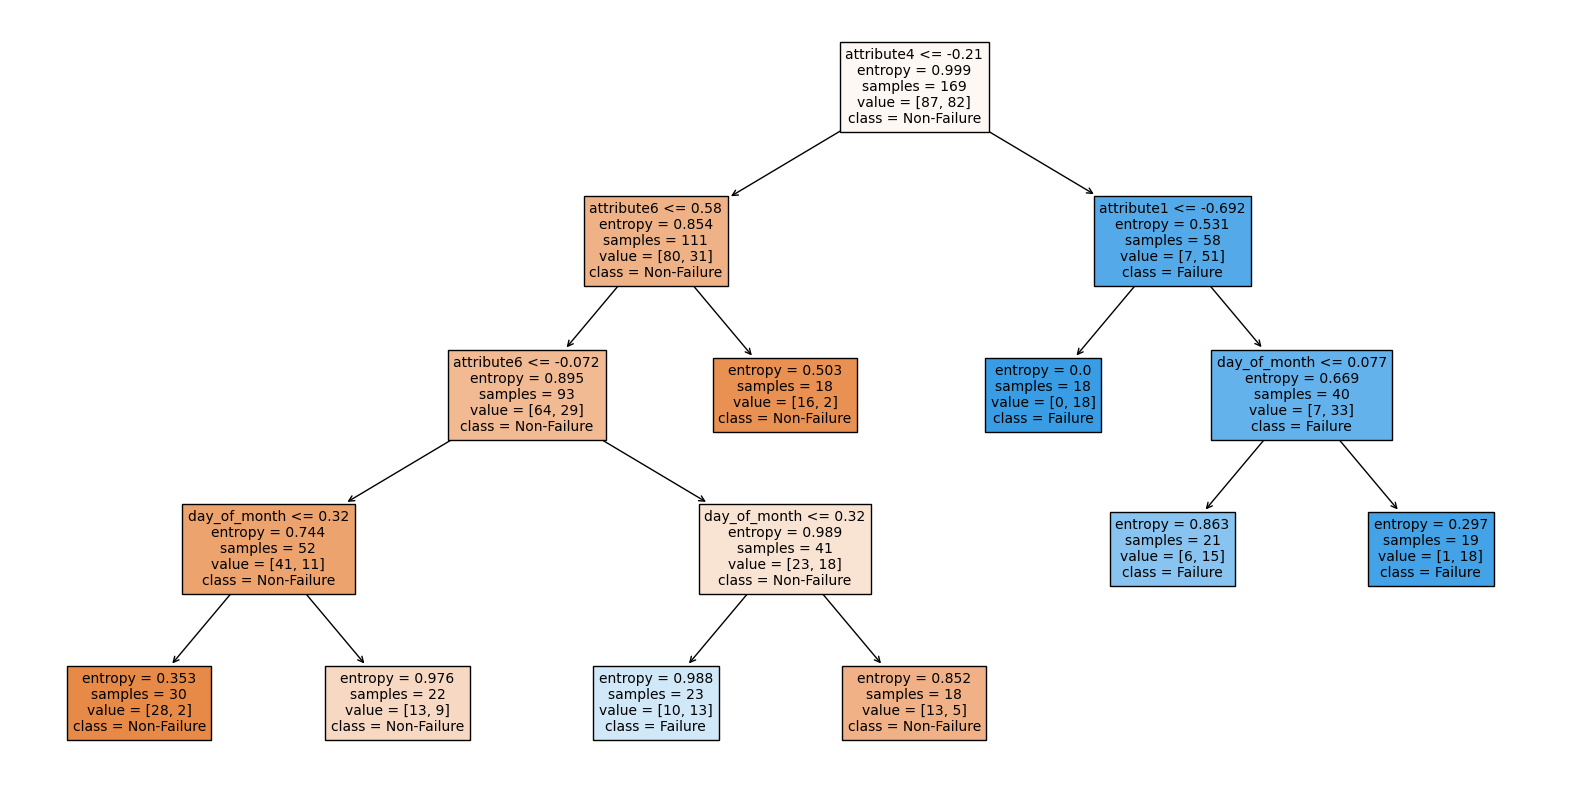

In [96]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(final_decision_tree, feature_names=x_train.columns.to_list(), class_names=["Non-Failure", "Failure"], filled=True, fontsize=10)
plt.show()


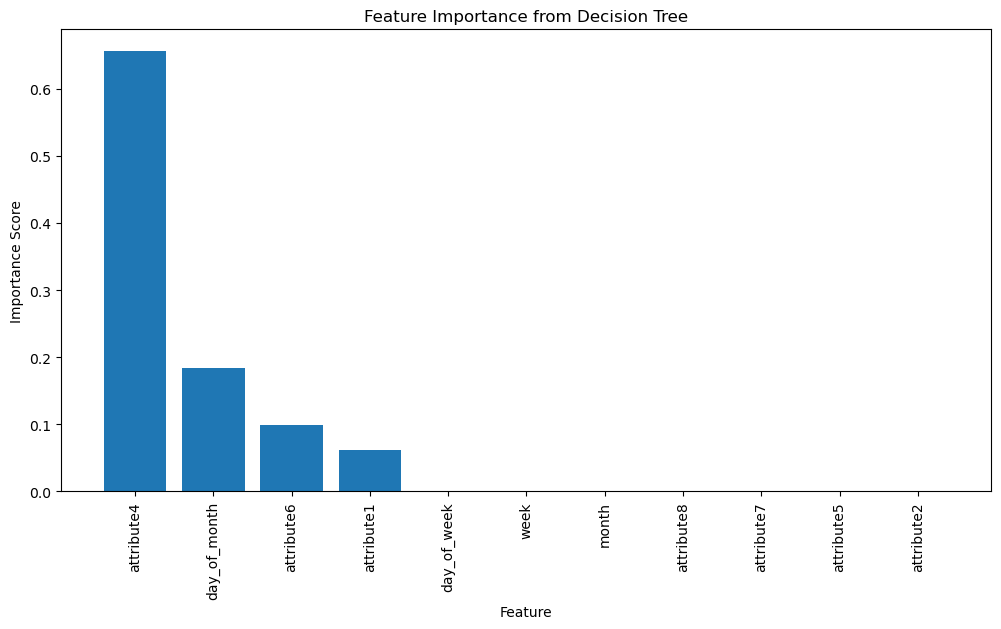

In [97]:
# Get feature importances
feature_importances = final_decision_tree.feature_importances_

# Get feature names
feature_names = x_train.columns

# Sort features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Sort feature names and importances accordingly
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance from Decision Tree")
plt.show()